### Business Objective

The objective is to build a machine learning model that can detect fraudulent financial transactions from large-scale data. Fraud, though rare, causes significant financial loss and impacts customer trust. By identifying high-risk transactions in real time, the business can reduce losses, support investigation teams, and enhance security while ensuring minimal disruption for genuine customers.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('AIML Dataset.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

### What percentage of transactions in the dataset are fraudulent?

In [9]:
round(data['isFraud'].value_counts()[1]/data.shape[0]*100,2)

0.13

#### What is the overall distribution of transactions across different types (CASH-IN, CASH-OUT, TRANSFER, PAYMENT, DEBIT)?

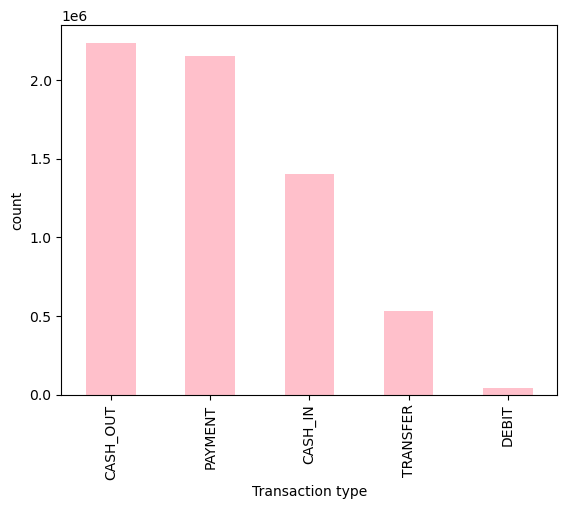

In [11]:
data['type'].value_counts().plot(kind = 'bar',color='pink')
plt.xlabel('Transaction type')
plt.ylabel('count')
plt.show()

#### Are some transaction types significantly more risky than others?

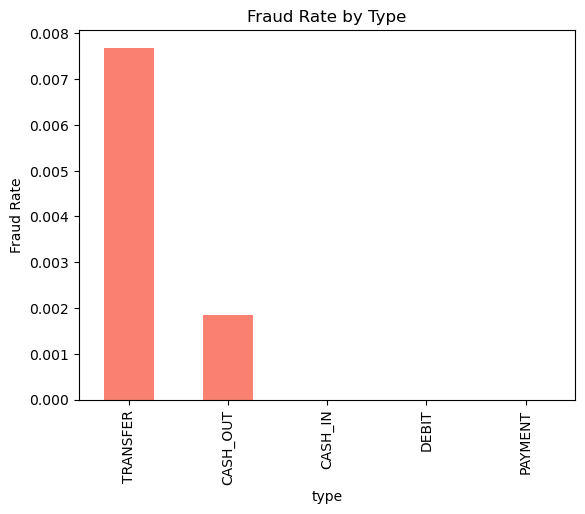

In [13]:
fraud_by_type = data.groupby('type')['isFraud'].mean().sort_values(ascending = False)
fraud_by_type.plot(kind = 'bar',title = 'Fraud Rate by Type',color = 'salmon')
plt.ylabel('Fraud Rate')
plt.show()             

#### Which transaction types are more prone to fraud (isFraud = 1) compared to legitimate ones (isFraud = 0)?

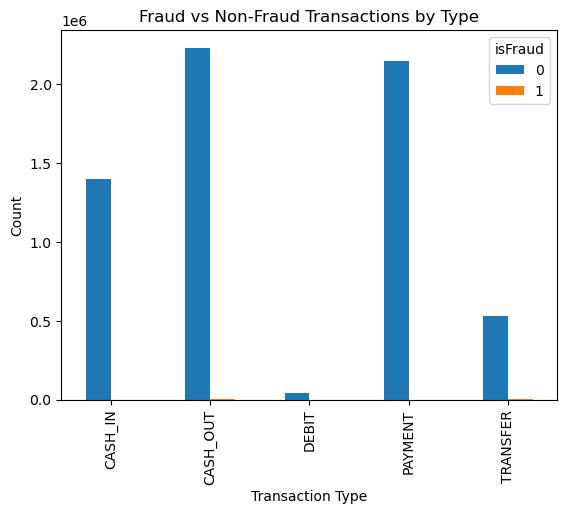

In [15]:
pd.crosstab(data['type'],data['isFraud']).plot(kind = 'bar')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Fraud vs Non-Fraud Transactions by Type")
plt.show()

#### How does the number of fraudulent transactions (isFraud = 1) change over time (step)?

In [17]:
fraud_over_time = data[data['isFraud']==1].groupby('step').size()

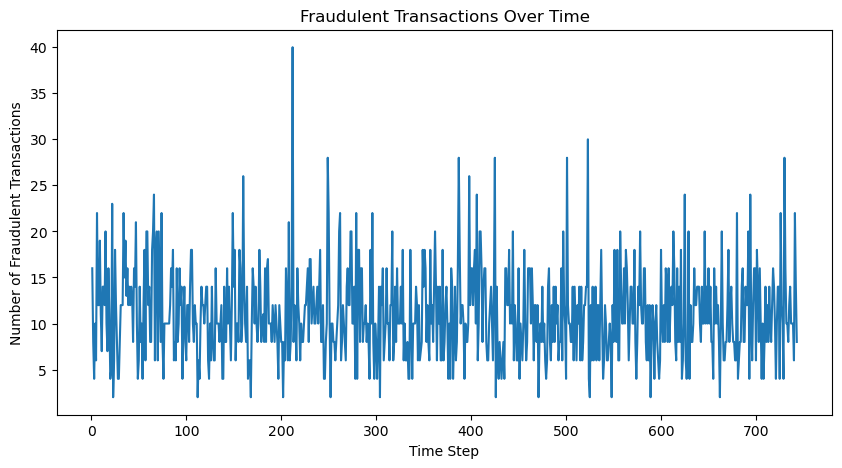

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(x=fraud_over_time.index, y=fraud_over_time.values)
plt.xlabel("Time Step")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Fraudulent Transactions Over Time")
plt.show()

#### Does fraud show any daily or hourly pattern if we convert step into actual time of day?

In [20]:
data['day'] = data['step']//24
data['hour'] = data['step'] % 24

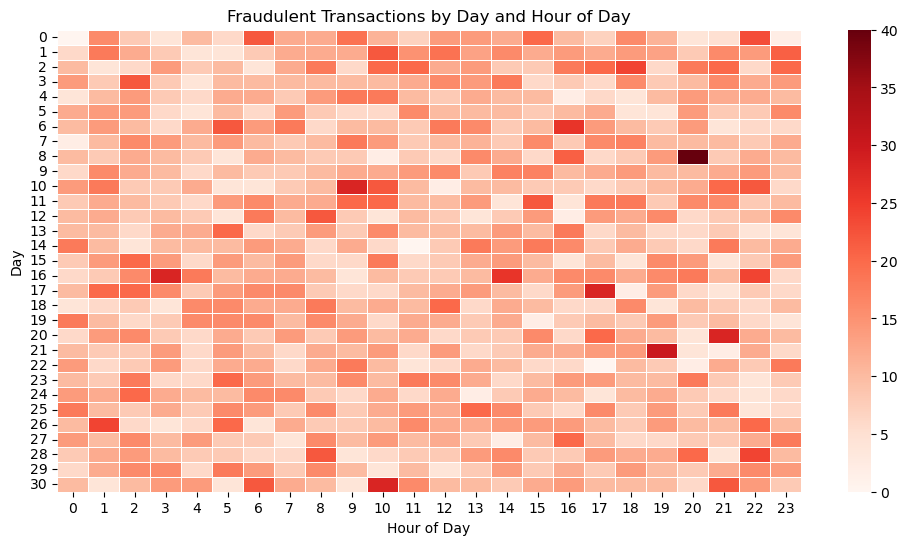

In [21]:
fraud_time = data[data['isFraud']==1].groupby(['day','hour']).size().unstack(fill_value = 0)
plt.figure(figsize=(12,6))
sns.heatmap(fraud_time, cmap="Reds", linewidths=0.5)
plt.title("Fraudulent Transactions by Day and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day")
plt.show()

#### How do transaction amounts differ between fraudulent (isFraud = 1) and non-fraudulent (isFraud = 0) transactions?

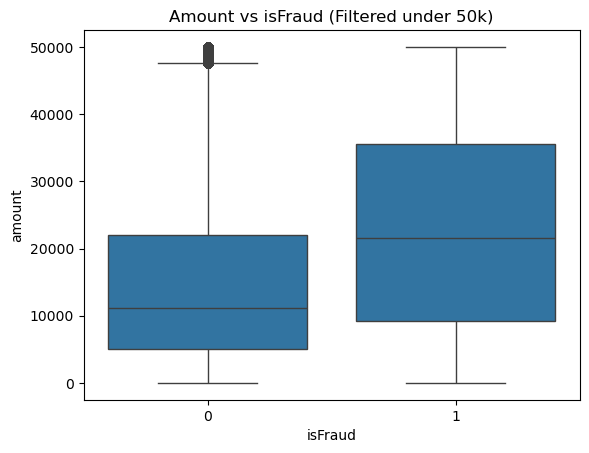

In [23]:
sns.boxplot(data=data[data['amount']<50000],x = 'isFraud',y='amount')
plt.title('Amount vs isFraud (Filtered under 50k)')
plt.show()

#### What are the summary statistics of transaction amounts?

In [25]:
data['amount'].describe().astype('int')

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

#### Who are the top 10 most frequent fraudsters?

In [27]:
fraud_users = data[data['isFraud']==1]['nameOrig'].value_counts().head(10)
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

#### Are there features that are highly correlated with each other (potential multicollinearity)

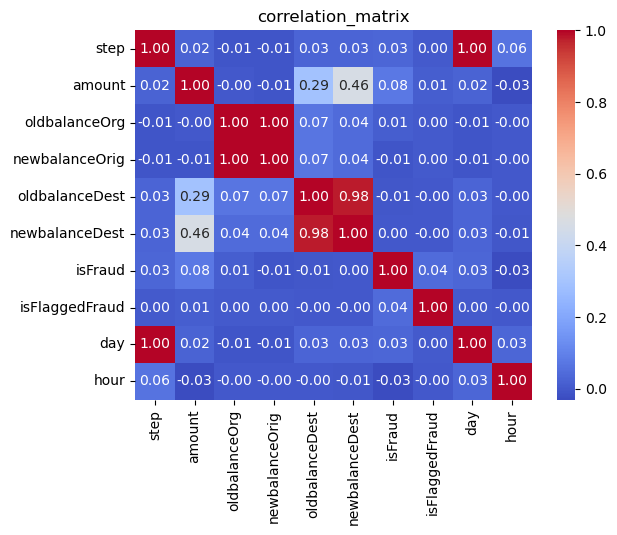

In [29]:
sns.heatmap(data.select_dtypes(include='number').corr(),annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title('correlation_matrix')
plt.show()

In [30]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,hour
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,30,23
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,30,23
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,30,23
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,30,23


#### How many transactions result in the sender’s balance dropping to zero after a TRANSFER or CASH_OUT, despite having a positive initial balance?

In [32]:
zero_after_transfer = data[
                      (data['oldbalanceOrg']>0) &
                      (data['newbalanceOrig']==0) &
                      (data['type'].isin(['TRANSFERr','CASH_OUT']))
]
len(zero_after_transfer)         

959412

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRFClassifier

In [34]:
#lets drop some column
data.drop(['nameOrig','nameDest','isFlaggedFraud','step'],axis = 1,inplace = True)

#### Encoding of categorical variable

In [36]:
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])

In [37]:
x = data.drop('isFraud',axis = 1)
y = data['isFraud']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,stratify = y)

#### scalling

In [75]:
scaler = StandardScaler()
x_train_s = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns,index = x_train.index)
x_test_s = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns,index = x_test.index)

#### Modelling

In [86]:
model_lr = LogisticRegression(class_weight = 'balanced')

In [88]:
model_lr.fit(x_train_s,y_train)

LogisticRegression(class_weight='balanced')

In [90]:
y_pred = model_lr.predict(x_test_s)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1906322
           1       0.03      0.90      0.06      2464

    accuracy                           0.96   1908786
   macro avg       0.51      0.93      0.52   1908786
weighted avg       1.00      0.96      0.98   1908786



In [100]:
model_xg =  XGBRFClassifier()

In [102]:
model_xg.fit(x_train_s,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)

In [118]:
y_pred = model_xg.predict(x_test_s)
y_preds = model_xg.predict_proba(x_test_s)[:,1]

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906322
           1       0.11      0.87      0.20      2464

    accuracy                           0.99   1908786
   macro avg       0.56      0.93      0.60   1908786
weighted avg       1.00      0.99      0.99   1908786



In [132]:
#increasing precision
# default threshold = 0.5
y_class = (y_preds>0.9).astype(int)

In [134]:
print(classification_report(y_test,y_class))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906322
           1       0.17      0.85      0.28      2464

    accuracy                           0.99   1908786
   macro avg       0.58      0.92      0.64   1908786
weighted avg       1.00      0.99      1.00   1908786

